In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
from pysentimiento.preprocessing import preprocess_tweet

In [5]:
#Helper Functions

In [6]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [7]:
#Read Data

In [8]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv', 'data/raw_dataset-02.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    708 non-null    object
 1   label   708 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [10]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [11]:
# clean text, lowercase and remove punk
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x))

In [12]:
df.head()

,text,label,label_name
0,Oe Chacal,1,Neutral
1,Anda vete,0,Negative
2,a la firme,1,Neutral
3,"Chau, cojo",0,Negative
4,Tengo plata,1,Neutral


In [13]:
df.sample(n = 30)

,text,label,label_name
662,"Y ahora los barristas, espero que se hayan lav...",0,Negative
167,Habían roto un vidrio,0,Negative
29,Te ha fregado,0,Negative
339,Más bien la pinga se me achica,0,Negative
237,"No seas rosquete, pecoso",0,Negative
625,Estoy esperando a mi chibolo,1,Neutral
141,"Ay, pobre, qué piña",0,Negative
44,El pobre negro,0,Negative
677,¿Quién es el cobarde? Por cabrones como tú nos...,0,Negative
506,"Chola mañosa, carajo, ya se jodió conmigo",0,Negative


In [14]:
#Visualizations

In [15]:
#Word Cloud

In [16]:
from wordcloud import WordCloud


In [17]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [18]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update([ "chingo", "xq","aaay","Jajajaa","perra","kieren","verga","inés"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


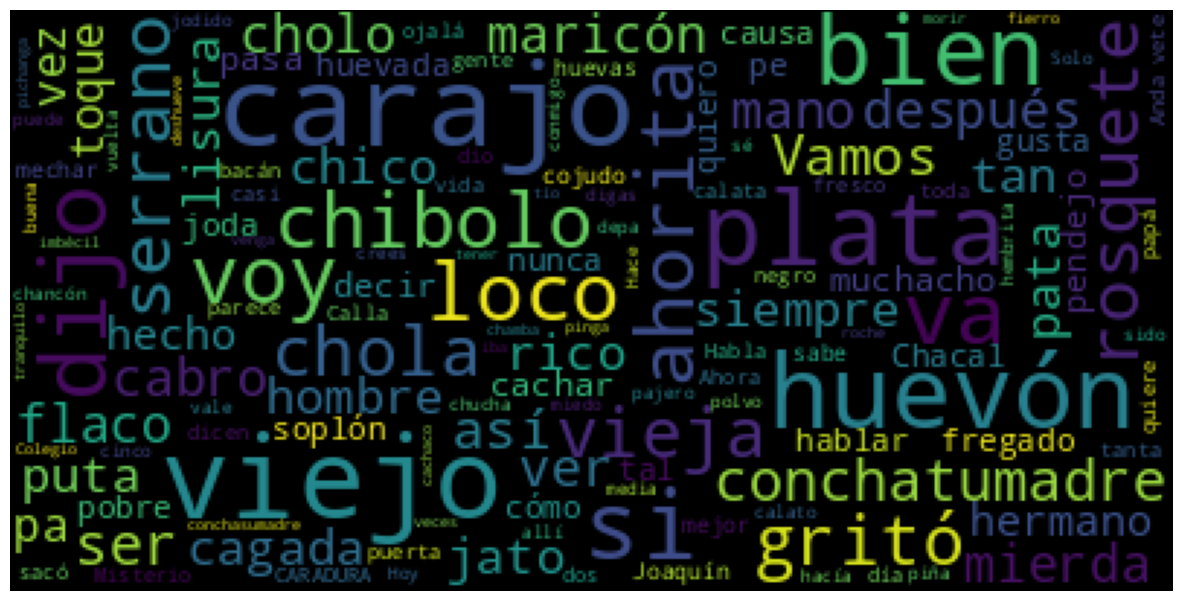

In [19]:
show_wordcloud(df["text"].values)

In [20]:
#Target Count

In [21]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [22]:
#Token Counts with simple tokenizer¶


In [23]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

In [24]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [25]:
(df.sent_token_length < 20).mean()

0.9759887005649718

In [26]:
#Token Counts with roBERTuito tokenizer

In [27]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [28]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

In [29]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [30]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 20).mean()

0.96045197740113

In [31]:
#Characters Count in the Data

In [32]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

import seaborn as sns
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_6990/1990021368.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




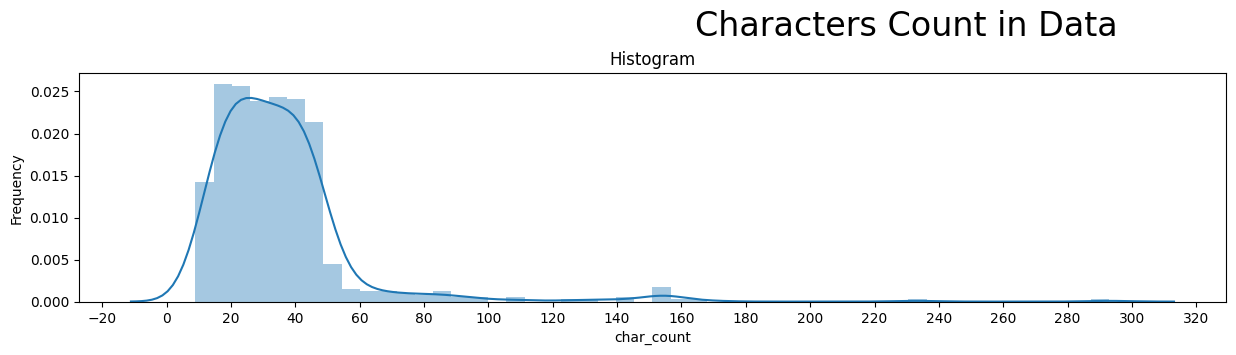

In [33]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [34]:
#Reviews Lengths

In [35]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_6990/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_6990/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




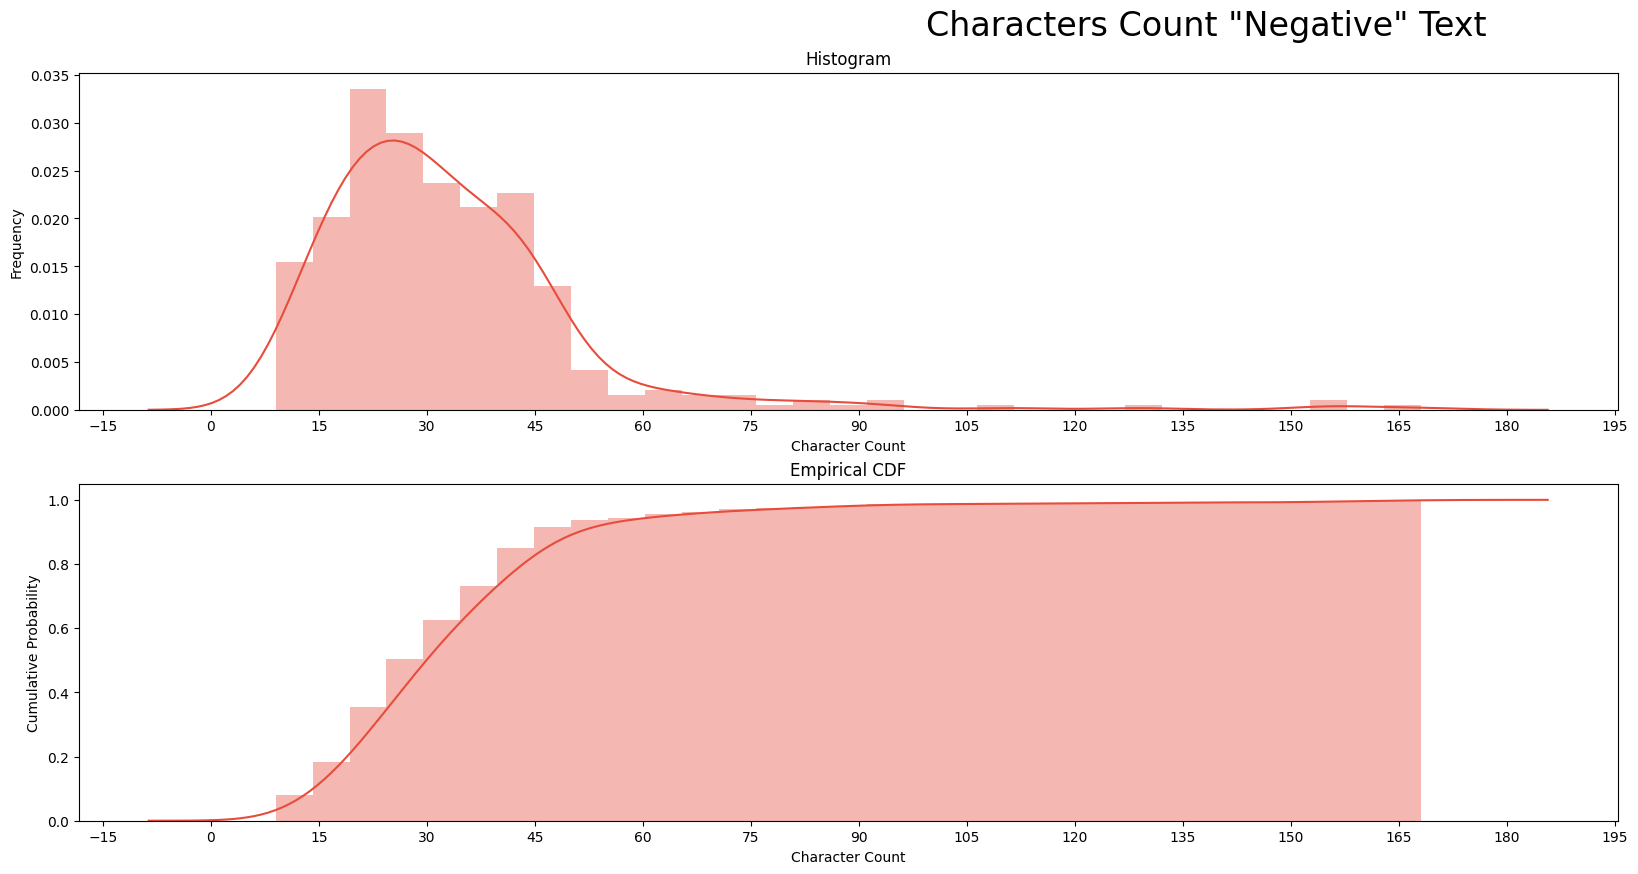

In [36]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

/tmp/ipykernel_6990/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_6990/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




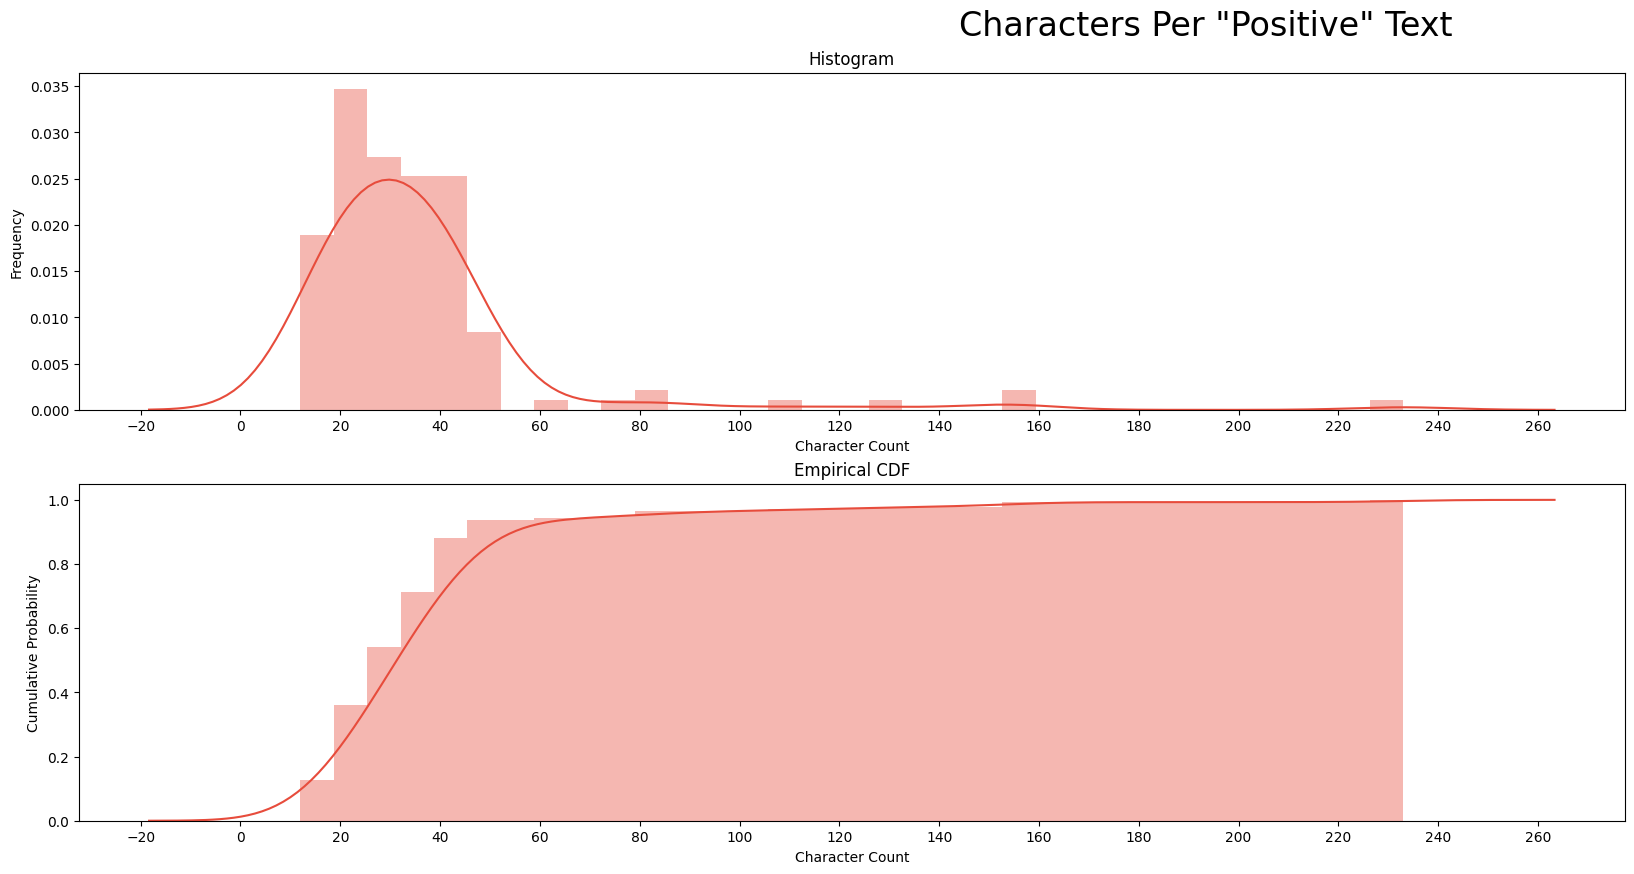

In [37]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

/tmp/ipykernel_6990/3249694284.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_6990/3249694284.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




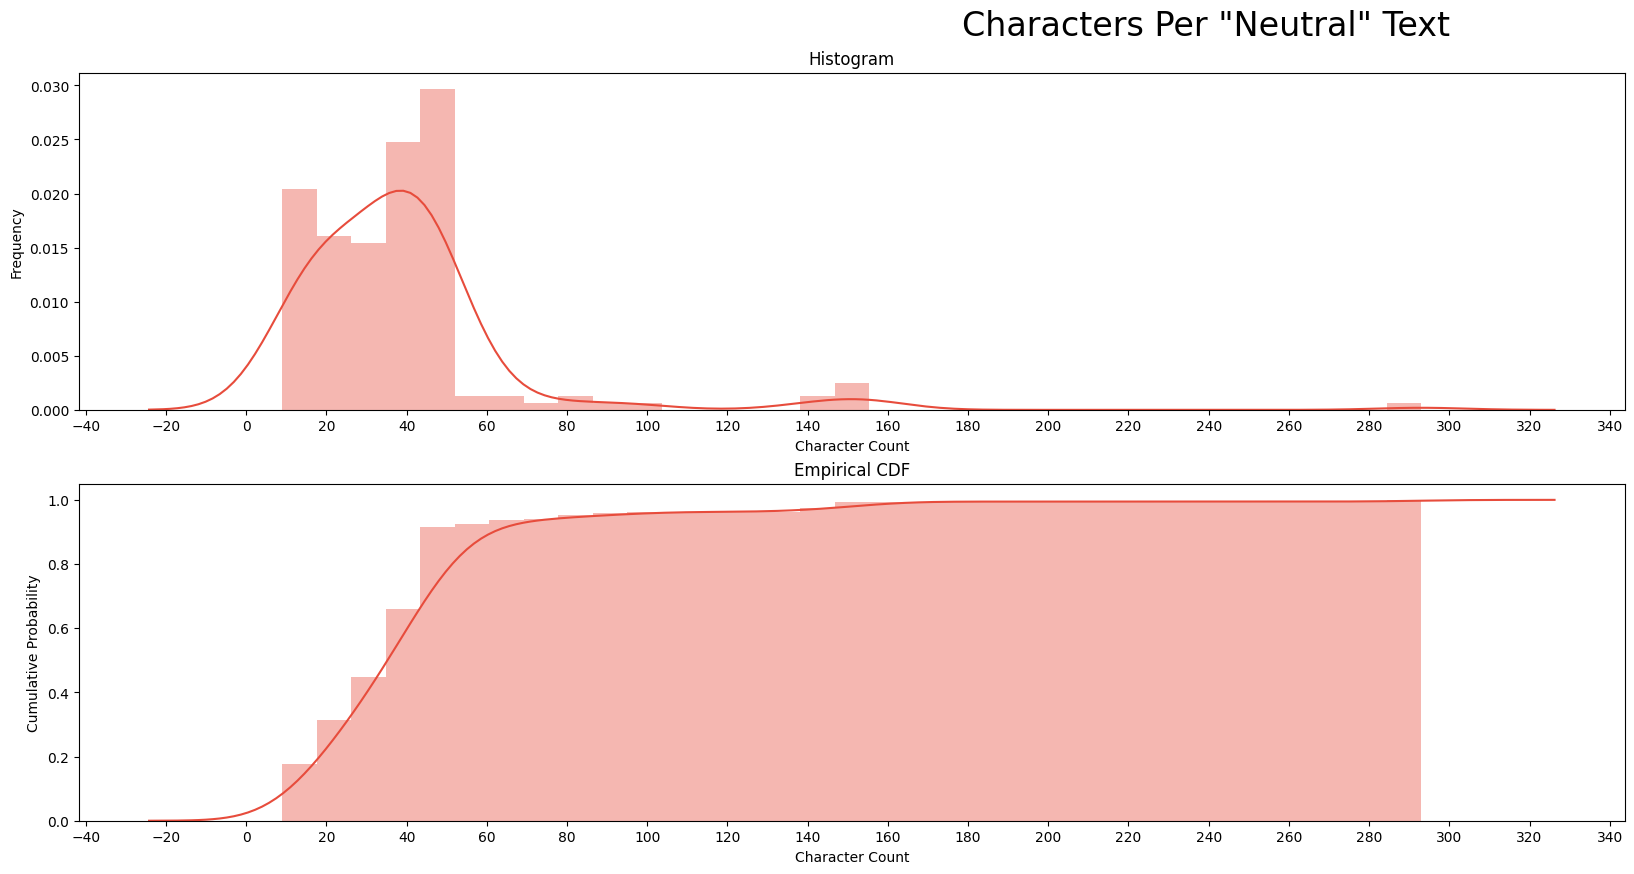

In [38]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [39]:
#Word Counts

In [40]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

/tmp/ipykernel_6990/1976843201.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_6990/1976843201.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_6990/1976843201.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

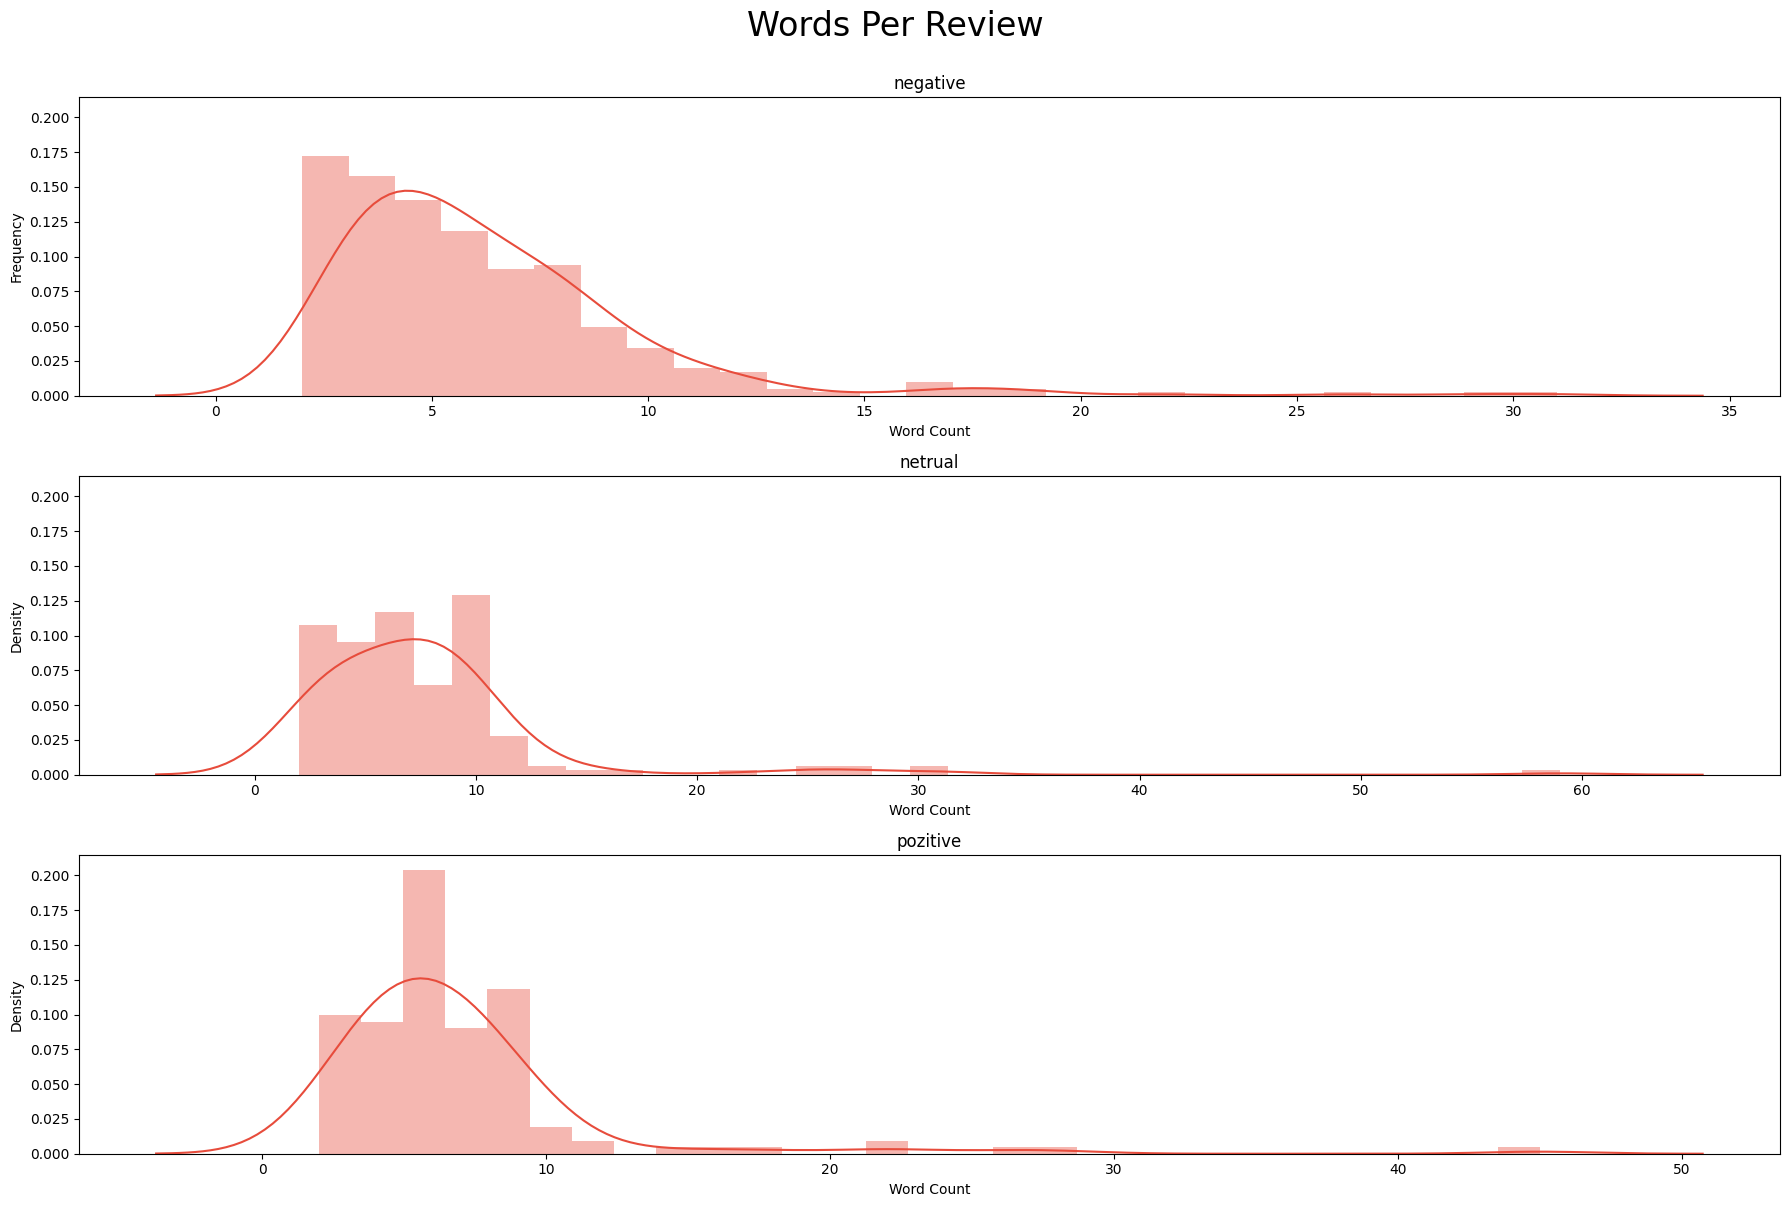

In [41]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [42]:
# remove punk 
#df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [43]:
df['tokenized_text'][:50]

0          Oe Chacal
1          Anda vete
2         a la firme
3         Chau, cojo
4        Tengo plata
5        Así no vale
6        tas huevón
7        Tanta finta
8       no jodas pe
9       estaba aguja
10      es la cagada
11      bien chévere
12     No seas cabro
13     ahorita acabo
14     Ahorita vengo
15     Estoy a punto
16     Ahorita salgo
17     Ahorita vengo
18     ahorita llega
19     Estás fregado
20     Parecías loco
21     tanta huevada
22     -Eres un vivo
23     Dale U carajo
24     eres mi causa
25     tanta huevada
26     Fui un huevón
27     es un chibolo
28     Es un maricón
29     Te ha fregado
30     Enano cabrón
31     tanta huevada
32    Vengan ahorita
33    Vuelvo ahorita
34    Ya la quemaron
35    habla Misterio
36    Mi viejo lloró
37    Vamos al toque
38    Anda a tu casa
39    Anda vete, sal
40    Vamos al toque
41    Sigue mechando
42    Desde chiquita
43    estoy voladazo
44    El pobre negro
45    No tengo plata
46    Era un chancón
47    No tení

In [44]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#Most Common ngrams

In [46]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [48]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

In [49]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [50]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [51]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [52]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [53]:
!ls -l

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


total 1472
-rw-rw-r-- 1 darkstar darkstar   39447 Oct 12 21:40 01-build-datasets.ipynb
-rw-rw-r-- 1 darkstar darkstar 1396293 Oct 10 16:52 02-pilot-eda.ipynb
-rw-rw-r-- 1 darkstar darkstar   58401 Oct 10 17:21 03-pilot-train.ipynb
drwxrwxr-x 3 darkstar darkstar    4096 Oct 10 16:16 data
drwxrwxr-x 2 darkstar darkstar    4096 Oct 10 14:30 test_trainer


In [54]:
len(train_df)

573

In [55]:
len(test_df)

64

In [56]:


len(val_df)

71

In [57]:
df.sample(n = 30)

,text,label,label_name,tokenized_text,sent_token_length,sent_bert_token_length,char_count,Character Count
71,"Lechero, carajo",2,Positive,"Lechero, carajo",2,3,15,15
642,además los chibolos de la barra siempre pican ...,0,Negative,además los chibolos de la barra siempre pican ...,11,16,61,61
476,a ochenta centavos la vara está regalada,1,Neutral,a ochenta centavos la vara está regalada,7,10,40,40
614,y tengo ganas de ir a verte a donde carajo estés,2,Positive,y tengo ganas de ir a verte a donde carajo estés,11,11,48,48
661,¿O sea que tú nunca has visto la calata de Ca...,1,Neutral,¿O sea que tú nunca has visto la calata de Ca...,11,13,52,52
633,¿Qué dijimos de las lisuras?,0,Negative,¿Qué dijimos de las lisuras?,5,7,28,28
168,Estás haciendo trampa,0,Negative,Estás haciendo trampa,3,3,21,21
11,bien chévere,2,Positive,bien chévere,2,3,12,12
492,Después de hacerle la cagada a los gorilas,0,Negative,Después de hacerle la cagada a los gorilas,8,9,42,42
38,Anda a tu casa,1,Neutral,Anda a tu casa,4,4,14,14
